<a href="https://colab.research.google.com/github/vladop22/PRA3024-Analysis-of-Big-Data-in-Physics/blob/main/Vlado_Week1_assignment_LHCb_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Particle Physics 

In [122]:
#First, we need to install the package that will be used for file handling.
!pip install uproot awkward lz4 xxhash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [123]:
#Since we cannot use the ROOT package in this colab environment, we can import uproot to read the ROOT file.
#We also need to import a Phython library for working with arrays (numpy) and a plotting package (matplotlib)
#Scipy functions will be used in Mass fitting task
import uproot
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit

In [124]:
#Now we can open the file we want to perform the analysis on
f=uproot.open ("/content/drive/MyDrive/B2HHH_MagnetDown.root: DecayTree") #I was unable to open the MagUp file so I'm using the MagDown file
# f.keys() 'keys' function outlines variables found in the file
f.show() # shows the variables and data types

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

Mometum of the x,y, and z components of the daughter particle 

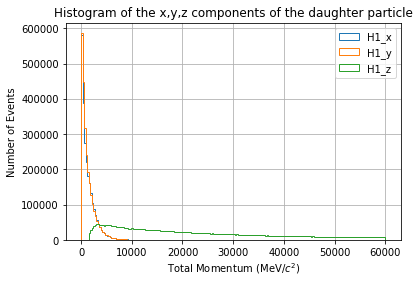

In [125]:
#Then, we can create separate arrays of the x,y,z components of the momentum and plot them on the same graph using the 'step function'. 
H1_Px = f["H1_PX"].array(library="np")
H1_Py = f["H1_PY"].array(library="np")
H1_Pz = f["H1_PZ"].array(library="np")

plt.hist(H1_Px, bins= 200,  range=[0, 60000], histtype = 'step', label="H1_x")
plt.hist(H1_Py, bins= 200,  range=[0, 60000], histtype = 'step', label="H1_y")
plt.hist(H1_Pz, bins= 200,  range=[0, 60000], histtype = 'step',  label="H1_z")
plt.xlabel("Total Momentum (MeV/$c^2$)")
plt.ylabel("Number of Events")
plt.title("Histogram of the x,y,z components of the daughter particle")
plt.legend(loc='upper right')
plt.grid()

Total momentum of the mother particle

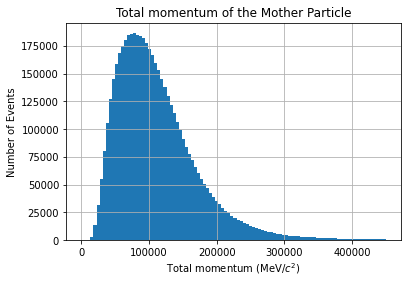

In [126]:
#First, we retrieve the x,y, and z components of H2 and H3 as we did in the previous cell for H1 and then calculate the total mother momentum using the sqrt function defined. 
H2_Px = f["H2_PX"].array(library="np")
H2_Py = f["H2_PY"].array(library="np")
H2_Pz = f["H2_PZ"].array(library="np")
H3_Px = f["H3_PX"].array(library="np")
H3_Py = f["H3_PY"].array(library="np")
H3_Pz = f["H3_PZ"].array(library="np")

P_Total = np.sqrt((H1_Px + H1_Py + H1_Pz)**2 + (H2_Px + H2_Py + H2_Pz)**2 + (H3_Px + H3_Py + H3_Pz)**2)
#We have to use the function 'np.sqrt' since only size-1 arrays can be converted to python scalars

#Plotting the mother particle momentum
plt.hist(P_Total, bins= 100, range=[0, 450000])
plt.title("Total momentum of the Mother Particle")
plt.ylabel("Number of Events")
plt.xlabel("Total momentum (MeV/$c^2$)")
plt.grid()

Mass of the B meson

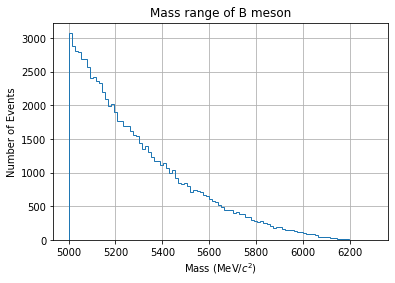

In [127]:
mass = 493.677 # mass of Kaon in MeV/c^2

#We need to calculate the total energy of each daughter particle using the relation: E^2 = M^2 + P^2
E_H1 = np.sqrt(mass**2 + np.sqrt(H1_Px**2 + H1_Py**2 + H1_Pz**2)**2)
E_H2 = np.sqrt(mass**2 + np.sqrt(H2_Px**2 + H2_Py**2 + H2_Pz**2)**2)
E_H3 = np.sqrt(mass**2 + np.sqrt(H3_Px**2 + H3_Py**2 + H3_Pz**2)**2)

#Then, we combine the total individual energies of each daughter particle
TOTAL_DAUGHTER_E = E_H1 + E_H2 + E_H3

#Similarly, we need to calculate the total momentum of each of the daughter particle and then combine them.
Total_P_H1 = np.sqrt((H1_Px**2 + H1_Py**2 + H1_Pz**2))
Total_P_H2 = np.sqrt((H2_Px**2 + H2_Py**2 + H2_Pz**2))
Total_P_H3 = np.sqrt((H3_Px**2 + H3_Py**2 + H3_Pz**2))

P_TOTAL = Total_P_H1 + Total_P_H2 + Total_P_H3

#Using the relation below, we combine the total energy of each of the daughter particle and the momentum to find the mass range of the B meson
motherMass = np.sqrt((TOTAL_DAUGHTER_E**2) - (P_TOTAL**2))

plt.hist(motherMass, bins= 100, histtype="step", range=[5000,6300])
plt.xlabel("Mass (MeV/$c^2$)")
plt.ylabel("Number of Events")
plt.title("Mass range of B meson")
plt.grid()

Probability of finding H1, H2, and H3 to be a Kaon



Text(0.5, 0, 'Probability value')

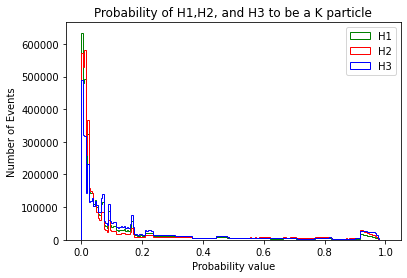

In [128]:
#First we need to extract the probability of each H1, H2, H3 particle to be a Kaon from the data file
Prob_H1_Kaon = f["H1_ProbK"].array(library="np")
Prob_H2_Kaon = f["H2_ProbK"].array(library="np")
Prob_H3_Kaon = f["H3_ProbK"].array(library="np")

#Then, we need to plot all of the probabilities on the same graph using the 'step' function
plt.hist(Prob_H1_Kaon, 200, range = [0,1], ec = "green", histtype = u'step', label="H1")
plt.hist(Prob_H2_Kaon, 200, range = [0,1], ec = "red", histtype = u'step', label="H2")
plt.hist(Prob_H3_Kaon, 200, range = [0,1], ec = "blue", histtype = u'step', label="H3")

plt.title("Probability of H1,H2, and H3 to be a K particle")
plt.legend(loc="best")
plt.ylabel("Number of Events")
plt.xlabel("Probability value")

Probability of finding H1, H2, and H3 to be a Pion


Text(0.5, 0, 'Probability value')

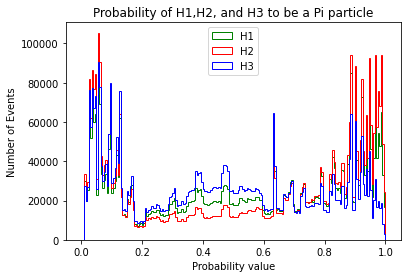

In [129]:
#Using the same method as indicated in the cell above, we will plot the probability of H1,H2, and H3 particle being a Pion
Prob_H1_Pion = f["H1_ProbPi"].array(library="np")
Prob_H2_Pion = f["H2_ProbPi"].array(library="np")
Prob_H3_Pion = f["H3_ProbPi"].array(library="np")

plt.hist(Prob_H1_Pion, 200, range = [0,1], ec = "green", histtype = u'step', label="H1")
plt.hist(Prob_H2_Pion, 200, range = [0,1], ec = "red", histtype = u'step', label="H2")
plt.hist(Prob_H3_Pion, 200, range = [0,1], ec = "blue", histtype = u'step', label="H3")

plt.title("Probability of H1,H2, and H3 to be a Pi particle")
plt.legend(loc="upper center")
plt.ylabel("Number of Events")
plt.xlabel("Probability value")

Chi2 plot

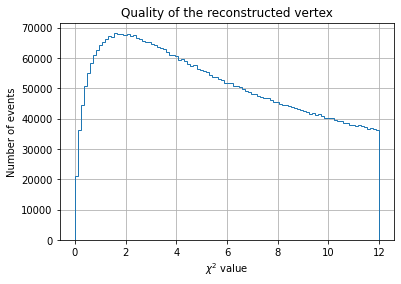

In [130]:
Chi2 = f.arrays("B_VertexChi2", library="np")["B_VertexChi2"] # first we retrieve the B_VertexChi2 value and store it in arrays
plt.hist(Chi2, bins=100, histtype="step")
plt.xlabel("$\chi^2$ value")
plt.ylabel("Number of events")
plt.title("Quality of the reconstructed vertex")
plt.grid()

Probability of H1, H2, and H3 being a Kaon after applying cuts 

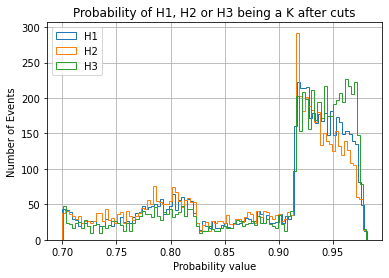

In [131]:
#We can define a function that will apply the given cuts to the data and return them after passing those cuts
def cuts(n):
    return f"(H{n}_ProbK>0.7)&(H{n}_isMuon==0)"

condition = f"{cuts(1)}&{cuts(2)}&{cuts(3)}"
cut = f.arrays(cut=condition,library="np") #Based on the condition values, we can make an array with the return values that will make it easier to plot

plt.hist(cut["H1_ProbK"], bins= 100,  label="H1", histtype = 'step')
plt.hist(cut["H2_ProbK"], bins= 100,  label="H2", histtype = 'step')
plt.hist(cut["H3_ProbK"], bins= 100,  label="H3", histtype = 'step')
plt.title(f"Probability of H1, H2 or H3 being a K after cuts")
plt.xlabel("Probability value")
plt.ylabel("Number of Events")
plt.legend(loc="upper left")
plt.grid()


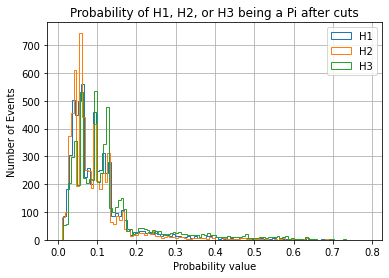

In [132]:
plt.hist(cut["H1_ProbPi"], bins= 100,  label="H1", histtype = 'step')
plt.hist(cut["H2_ProbPi"], bins= 100,  label="H2", histtype = 'step')
plt.hist(cut["H3_ProbPi"], bins= 100,  label="H3", histtype = 'step') 
#applying cuts separately to each daughter particle, no Muon restrictions 

plt.title(f"Probability of H1, H2, or H3 being a Pi after cuts")
plt.ylabel("Number of Events")
plt.xlabel("Probability value")
plt.legend(loc="upper right")
plt.grid()

Data filtering- plotting unfiltered and filtered data together

Text(0.5, 1.0, 'B meson mass range')

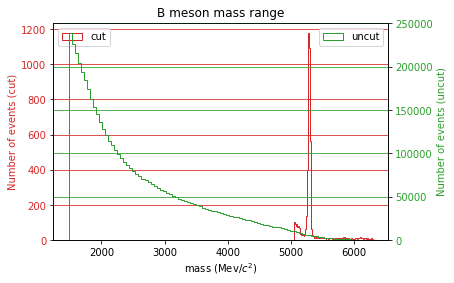

In [133]:
def energy(momentum):
    return np.sqrt(momentum**2+mass**2) # simplifies the calculation belowe if we predetermine the energy(momentum) function 

#We start of by defining 2 functions that will return the cut value of the daughter and the mother particle momenta:
def daughter_P_Cuts(n):
    return np.sqrt(cut[f"H{n}_PX"]**2+cut[f"H{n}_PY"]**2+cut[f"H{n}_PZ"]**2) # cuts applied in the x,y, and z direction

def mother_P_Cut(direction):
    return cut[f"H1_P{direction}"]+cut[f"H2_P{direction}"]+cut[f"H3_P{direction}"] #cuts applied separately to H1, H2, and H3 particle 

#Then, we can define the energy and momentum cut from the defined functions to obtain the mass cut of the mother particle
Daughter_E_Cut = energy(daughter_P_Cuts(1))+energy(daughter_P_Cuts(2))+energy(daughter_P_Cuts(3))
Mother_TotalP_Cut = np.sqrt(mother_P_Cut("X")**2+mother_P_Cut("Y")**2+mother_P_Cut("Z")**2)
Mother_M_Cut = np.sqrt(Daughter_E_Cut**2-Mother_TotalP_Cut**2)

#Important to note: the filtered and unfiltered data sets will differ largely in the number of events; Therefore, it is optimal to create to separate y-axis on the same x-axis.
fig, ax1 = plt.subplots() #subplots allows us to create 2 differet y-axis on the same graph
color = 'tab:red'
ax1.set_xlabel('mass (Mev/$c^2$)')
ax1.set_ylabel('Number of events (cut)', color=color)
ax1.hist(Mother_M_Cut, bins=100, color=color, histtype="step", label="cut")
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc="best")
plt.grid(axis='y', color=color)

ax2 = ax1.twinx() # creates a y-axis that shares the same x-axis as the cut data
color = 'tab:green'
ax2.set_ylabel('Number of events (uncut)', color=color)
ax2.hist(motherMass, bins=100, color=color, histtype="step", label="uncut")
ax2.tick_params(axis='y', labelcolor=color)

plt.grid(axis='y', color=color, which='both')
plt.grid(axis='x', color='g')
plt.legend(loc="best")
plt.title("B meson mass range")

Mass fiting

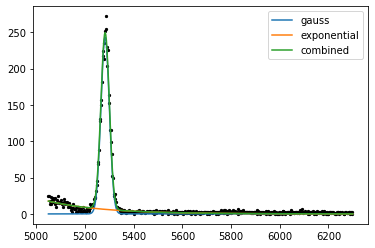

In [134]:
mmin, mmax= min(Mother_M_Cut), max(Mother_M_Cut) #we define the min and max value using the function Mother_M_Cut defined in the cell above
m = np.linspace(mmin, mmax, 500)
hist, bins = np.histogram(Mother_M_Cut, bins=100)

#first, we define functions for parameters of the three models we will use: gaussian, exponential and 'model'
def gaussian( x,  mu, sigma, ampg):
    return ampg*stats.norm.pdf(x, mu, sigma)
def exponential(x, a,b,ampe):
    return ampe*stats.expon.pdf(x,a,b)
def model(x, mu, sigma,ampg, a,b, ampe):
    return gaussian(x, mu, sigma,ampg)+exponential(x, a,b,ampe) # we're basing the model based on the combination of the exponential and the gaussian distribution

mug,sigmag = stats.norm.fit(Mother_M_Cut)
a,b = stats.expon.fit(Mother_M_Cut)

dataentry, bins = np.histogram(Mother_M_Cut, bins=500)
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
pguess = [ mug,sigmag,25000, a,b, 25000]
parameters, covariance = curve_fit(model, xdata=bins[0:500], ydata=dataentry, p0=pguess) #we use the curve_fit to find the optimal parameter values for our data

mu, sigma, ampg, a,b, ampe = parameters
plt.plot(m, gaussian(m, mu, sigma, ampg), label="gauss")
plt.plot(m, exponential(m, a, b, ampe), label="exponential")
plt.plot(m, model(m, mu, sigma, ampg, a,b, ampe), label="combined")
plt.scatter(bins[0:500], dataentry, color="black", s=5)
plt.legend()

Counting

In [135]:
def daughter_charge():
    return "H1_Charge+H2_Charge+H3_Charge"

#We can look for the number of positive and negative charges in H1, H2 and H3. If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B-, with 2 it should be a B+

condition = f"{filter(1)}&{filter(2)}&{filter(3)}"
cut = f.arrays(cut=condition,library="np")    
Nminus = len(f.arrays(cut=f"({daughter_charge()}==-1)&{condition}", library="pd"))
Nplus = len(f.arrays(cut=f"({daughter_charge()}==1)&{condition}", library="pd")) 
#Nminus/plus represents the number of events found from the fitted yield of the signal from each data set

def asymmetry(Nplus, Nminus):
    return (Nminus-Nplus)/(Nminus+Nplus) #

def deviation(Nplus, Nminus):
    return np.sqrt((1-asymmetry(Nplus, Nminus)**2)/(Nminus+Nplus)) #predefined formula for deviation 

print("The deviation in the model is:", deviation(Nminus,Nplus))
print("The Asymmetry of the model is:", asymmetry(Nminus,Nplus))

The deviation in the model is: 0.012717439713533774
The Asymmetry of the model is: 0.04928664072632944
